# Part 2: Digit Autoencoder

## Load prerequisites and dataset

In [ ]:
from nn import nn
from nn import io
from nn import preprocess
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [22]:
digits_data = sklearn.datasets.load_digits()

In [23]:
# Reshape data for processing
digits_input = digits_data["data"].reshape(1797, 64, 1)
digits_label = digits_data["target"].reshape(1797, 1, 1)

In [24]:
# Split data into training and validation sets
digits_input_permuted = np.random.permutation(digits_input) / 16.0
digits_input_train = digits_input_permuted[:digits_input.shape[0] * 7 // 10, :]
digits_input_val = digits_input_permuted[digits_input.shape[0] * 7 // 10:, :]

## Define and Train Autoencoder

In [25]:
# Define the autoencoder
digit_autoencoder = nn.NeuralNetwork([{"input_dim": 64, "output_dim": 16, "activation": "sigmoid"},
                                         {"input_dim": 16, "output_dim": 64, "activation": "sigmoid"}],
                                         lr=0.015,
                                         seed=42,
                                         batch_size=20,
                                         epochs=7,
                                         loss_function="mean_square_error")

In [26]:
# Perform training
per_epoch_loss_train, per_epoch_loss_val = digit_autoencoder.fit(digits_input_train, 
                                                                 digits_input_train, 
                                                                 digits_input_val, 
                                                                 digits_input_val)

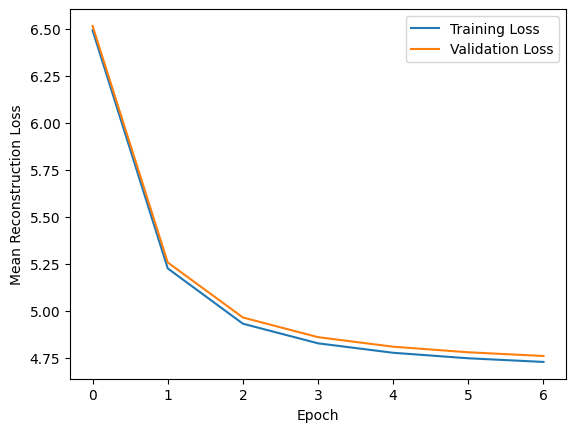

In [27]:
# Plot training and validation loss by epoch
fig, axs = plt.subplots()
axs.plot(per_epoch_loss_train, label="Training Loss")
axs.plot(per_epoch_loss_val, label="Validation Loss")
axs.set_xlabel("Epoch")
axs.set_ylabel("Mean Reconstruction Loss")
axs.legend()

In [ ]:
print(f"The average reconstruction loss in the validation set at the end of training is {per_epoch_loss_val[-1]}.")

# Treating the reconstruction and original as black-and-white images, quantify the average number of disagreeing pixels
reconstruction = digit_autoencoder.predict(digits_input_val)
validation_disagreement = np.mean(np.sum(np.round(reconstruction) != np.round(digits_input_val), axis=1))
print(f"The average number of disagreeing pixels in the reconstruction is {validation_disagreement} of 64")

The average reconstruction loss in the validation set at the end of training is 4.761083719104152.
The average number of agreeing pixels in the reconstruction is 50.61666666666667


I chose to normalize data values to between 0 and 1, so that a sigmoid activation function on the final layer would generate values in a comparable normalized range. However, I used the mean squared error as the loss function as we aim to find the difference between all pixels in the image.

I chose a relatively small batch size of 20 to allow more gradient descent updates for faster convergence, as performing each update is relatively fast with this data and model. 

I initially set a smaller learning rate and number of epochs, which did not cause the model loss to reach convergence. I manually increased the learning rate and number of epochs from this, to the point where model accuracy decreases until it begins to plateau. I did not increase the numbers further, as this would cause overfitting to the training set. The validation loss is largely in line with training loss, which indicates that no overfitting occurred.